In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_excel('sales.xlsx')

C:\sofware\anaconda3\envs\udemy\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
#df.info()

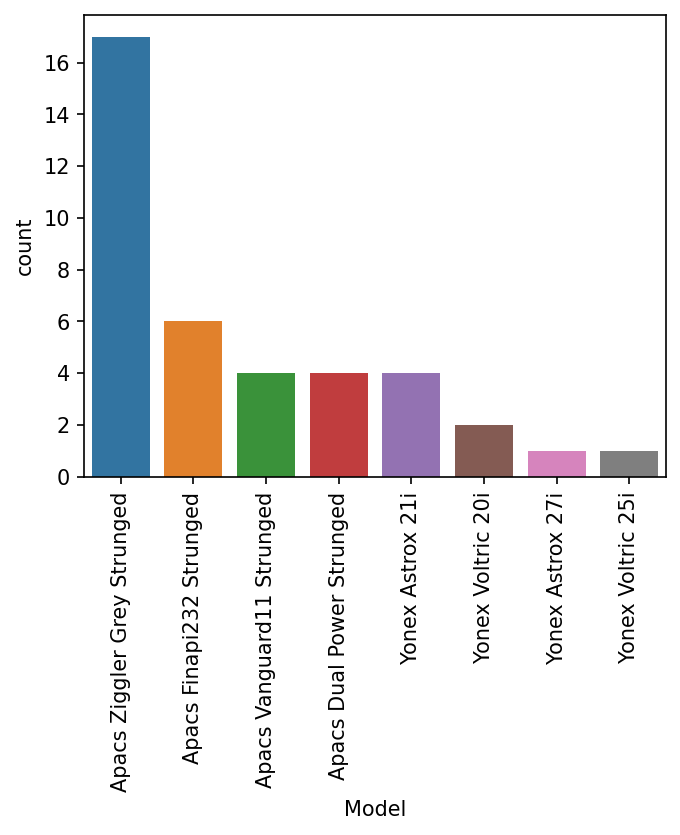

In [4]:
plt.figure(figsize=(5,4),dpi=150)
sns.countplot(data=sales,x='Model',order = sales['Model'].value_counts().index)
plt.xticks(rotation=90);

In [5]:
sales_o = sales['Model'].value_counts().to_frame()
sales_o.rename(columns={'Model': 'Quantity'}, inplace=True)
sales_o

,Quantity
Apacs Ziggler Grey Strunged,17
Apacs Finapi232 Strunged,6
Apacs Vanguard11 Strunged,4
Apacs Dual Power Strunged,4
Yonex Astrox 21i,4
Yonex Voltric 20i,2
Yonex Astrox 27i,1
Yonex Voltric 25i,1


In [6]:
print("Total Sales Units {}".format(sales_o['Quantity'].sum()))

Total Sales Units 39


In [7]:
purchased = pd.read_excel('purchase.xlsx')
purchased.head()

C:\sofware\anaconda3\envs\udemy\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Vendor Name,Model,INVOICE,Type,Purchase Date,Price,GST,Quantity,Total,Payment Status
0,ASHOK TRADING CO,Apacs Dual Power UnStrunged,7516/22-23,Racquet,2022-12-05,1339.0,0.12,5,7498.40,UNPAID
1,ASHOK TRADING CO,Apacs Vanguard11 UnStrunged,7516/22-23,Racquet,2022-12-05,1429.0,0.12,2,3200.96,UNPAID
2,ASHOK TRADING CO,Apacs Ziggler Grey UnStrunged,7516/22-23,Racquet,2022-12-05,1384.0,0.12,5,7750.40,UNPAID
3,ASHOK TRADING CO,SF Red Cricket Ball,7516/22-23,Cricket,2022-12-05,252.0,0.12,6,1693.44,UNPAID
4,ASHOK TRADING CO,SF Pink Cricket Ball,7516/22-23,Cricket,2022-12-05,263.0,0.12,6,1767.36,UNPAID


In [8]:
# collect all model types
purchased_dict = dict()
def collect_models(models,df):
    for model in models:
        m = df[(df['Model'].isin([model] )) ]
        purchased_dict[model] = m['Quantity'].sum()

In [9]:
racquet = purchased[(purchased['Type'] == 'Racquet') ]

In [10]:
collect_models(racquet['Model'],purchased)
df_purchased = pd.DataFrame(list(purchased_dict.items()),columns = ['Model','Quantity'])
df_purchased.set_index('Model',inplace=True)
df_purchased

,Quantity
Model,
Apacs Dual Power UnStrunged,5
Apacs Vanguard11 UnStrunged,2
Apacs Ziggler Grey UnStrunged,5
Yonex Astrox 21i,6
Yonex Astrox 27i,2
Apacs Ziggler Grey Strunged,15
Apacs Vanguard11 Strunged,4
Yonex Voltric 25i,2
Apacs Finapi232 Strunged,7


In [11]:
ndf = pd.DataFrame(data=
    [('Apacs Ziggler Grey Strunged',df_purchased.loc[['Apacs Ziggler Grey UnStrunged','Apacs Ziggler Grey Strunged']].sum()[0]),
     ('Apacs Dual Power Strunged',df_purchased.loc[['Apacs Dual Power UnStrunged']].sum()[0]),
     ('Apacs Vanguard11 Strunged',df_purchased.loc[['Apacs Vanguard11 UnStrunged','Apacs Vanguard11 Strunged']].sum()[0]),
     ('Apacs Finapi232 Strunged',df_purchased.loc[['Apacs Finapi232 Strunged']].sum()[0]),
     ('Yonex Voltric 20i',df_purchased.loc[['Yonex Voltric 20i']].sum()[0]),
     ('Yonex Astrox 21i',df_purchased.loc[['Yonex Astrox 21i']].sum()[0]),
     ('Yonex Voltric 25i',df_purchased.loc[['Yonex Voltric 25i']].sum()[0]),
     ('Yonex Astrox 27i',df_purchased.loc[['Yonex Astrox 27i']].sum()[0]),
    ],columns=['Model','Quantity'])
#ndf.set_index('Model',inplace=True)
ndf.sort_values('Quantity',ascending=False,inplace=True)

(0.0, 25.0)

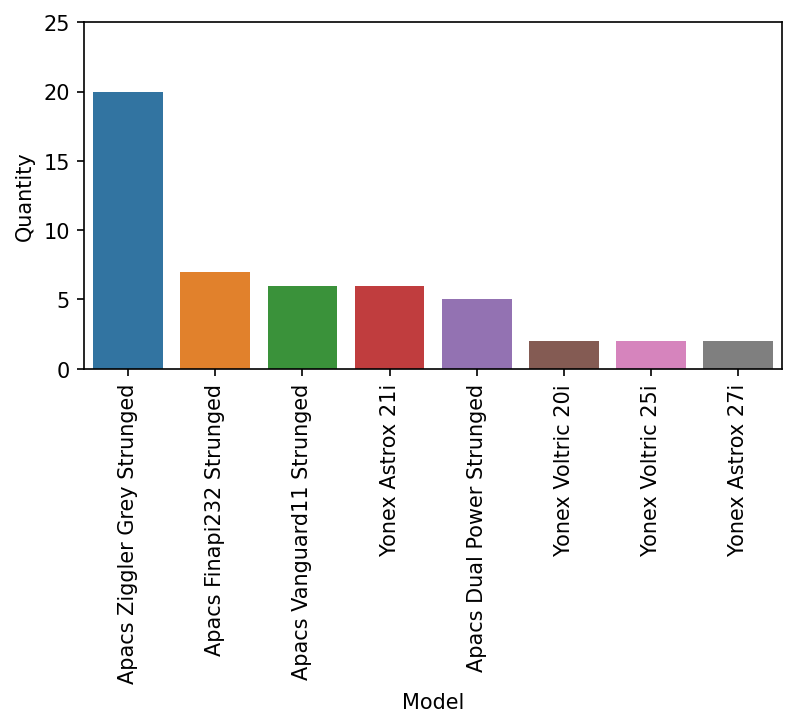

In [12]:
plt.figure(figsize=(6,3),dpi=150)
sns.barplot(x='Model',y='Quantity', data=ndf)
plt.xticks(rotation=90);
plt.ylim(0,25)

In [13]:
sales_o.index.rename('Model',inplace=True)
sales_o

,Quantity
Model,
Apacs Ziggler Grey Strunged,17
Apacs Finapi232 Strunged,6
Apacs Vanguard11 Strunged,4
Apacs Dual Power Strunged,4
Yonex Astrox 21i,4
Yonex Voltric 20i,2
Yonex Astrox 27i,1
Yonex Voltric 25i,1


In [14]:
ndf.set_index('Model',inplace=True)
ndf

,Quantity
Model,
Apacs Ziggler Grey Strunged,20
Apacs Finapi232 Strunged,7
Apacs Vanguard11 Strunged,6
Yonex Astrox 21i,6
Apacs Dual Power Strunged,5
Yonex Voltric 20i,2
Yonex Voltric 25i,2
Yonex Astrox 27i,2


In [15]:
print("Total Purchase Units {}".format(ndf['Quantity'].sum()))

Total Purchase Units 50


In [16]:
expected_in_stock = ndf.subtract(sales_o)
expected_in_stock.rename(columns = {'Quantity':'Expected Stock'}, inplace = True)
expected_in_stock

,Expected Stock
Model,
Apacs Dual Power Strunged,1
Apacs Finapi232 Strunged,1
Apacs Vanguard11 Strunged,2
Apacs Ziggler Grey Strunged,3
Yonex Astrox 21i,2
Yonex Astrox 27i,1
Yonex Voltric 20i,0
Yonex Voltric 25i,1


In [17]:
ndf.subtract(sales_o).sum()

Quantity    11
dtype: int64

In [18]:
stock = pd.read_excel('instock.xlsx')
stock.set_index('Model',inplace=True)
stock

,Current Stock
Model,
Apacs Ziggler Grey Strunged,0
Apacs Finapi232 Strunged,1
Apacs Vanguard11 Strunged,1
Apacs Dual Power Strunged,1
Yonex Voltric 20i,0
Yonex Astrox 21i,1
Yonex Voltric 25i,1
Yonex Astrox 27i,0


In [19]:
#missing = expected_in_stock.subtract(stock)
#missing = missing.reset_index()
#missing = missing.sort_values('Current Stock',ascending=False)
#missing
expected_in_stock

,Expected Stock
Model,
Apacs Dual Power Strunged,1
Apacs Finapi232 Strunged,1
Apacs Vanguard11 Strunged,2
Apacs Ziggler Grey Strunged,3
Yonex Astrox 21i,2
Yonex Astrox 27i,1
Yonex Voltric 20i,0
Yonex Voltric 25i,1


In [20]:
stock

,Current Stock
Model,
Apacs Ziggler Grey Strunged,0
Apacs Finapi232 Strunged,1
Apacs Vanguard11 Strunged,1
Apacs Dual Power Strunged,1
Yonex Voltric 20i,0
Yonex Astrox 21i,1
Yonex Voltric 25i,1
Yonex Astrox 27i,0


In [21]:
#sns.barplot(x='Model',y='Current Stock',data=missing)
#plt.xticks(rotation=90);

In [22]:
# total missing units
missing_units = ndf['Quantity'].sum() - sales_o['Quantity'].sum() - stock['Current Stock'].sum()
print("Total Missing Units {}".format(missing_units))

Total Missing Units 6


In [23]:
final = expected_in_stock.join(stock,how='inner')
final.fillna(0.0,inplace=True)
final

,Expected Stock,Current Stock
Model,,
Apacs Dual Power Strunged,1,1
Apacs Finapi232 Strunged,1,1
Apacs Vanguard11 Strunged,2,1
Apacs Ziggler Grey Strunged,3,0
Yonex Astrox 21i,2,1
Yonex Astrox 27i,1,0
Yonex Voltric 20i,0,0
Yonex Voltric 25i,1,1


In [24]:
#final[final['Expected Stock'] - final['Current Stock']]
final['Expected Stock'] = final['Expected Stock'].astype('float64')
final['Current Stock'] = final['Current Stock'].astype('float64')
final

,Expected Stock,Current Stock
Model,,
Apacs Dual Power Strunged,1.0,1.0
Apacs Finapi232 Strunged,1.0,1.0
Apacs Vanguard11 Strunged,2.0,1.0
Apacs Ziggler Grey Strunged,3.0,0.0
Yonex Astrox 21i,2.0,1.0
Yonex Astrox 27i,1.0,0.0
Yonex Voltric 20i,0.0,0.0
Yonex Voltric 25i,1.0,1.0


In [25]:
final['Missing'] = final['Expected Stock'] - final['Current Stock']
final

,Expected Stock,Current Stock,Missing
Model,,,
Apacs Dual Power Strunged,1.0,1.0,0.0
Apacs Finapi232 Strunged,1.0,1.0,0.0
Apacs Vanguard11 Strunged,2.0,1.0,1.0
Apacs Ziggler Grey Strunged,3.0,0.0,3.0
Yonex Astrox 21i,2.0,1.0,1.0
Yonex Astrox 27i,1.0,0.0,1.0
Yonex Voltric 20i,0.0,0.0,0.0
Yonex Voltric 25i,1.0,1.0,0.0


In [26]:
t = final.reset_index()
t.sort_values('Missing',inplace=True,ascending=False)
t

,Model,Expected Stock,Current Stock,Missing
3,Apacs Ziggler Grey Strunged,3.0,0.0,3.0
2,Apacs Vanguard11 Strunged,2.0,1.0,1.0
4,Yonex Astrox 21i,2.0,1.0,1.0
5,Yonex Astrox 27i,1.0,0.0,1.0
0,Apacs Dual Power Strunged,1.0,1.0,0.0
1,Apacs Finapi232 Strunged,1.0,1.0,0.0
6,Yonex Voltric 20i,0.0,0.0,0.0
7,Yonex Voltric 25i,1.0,1.0,0.0


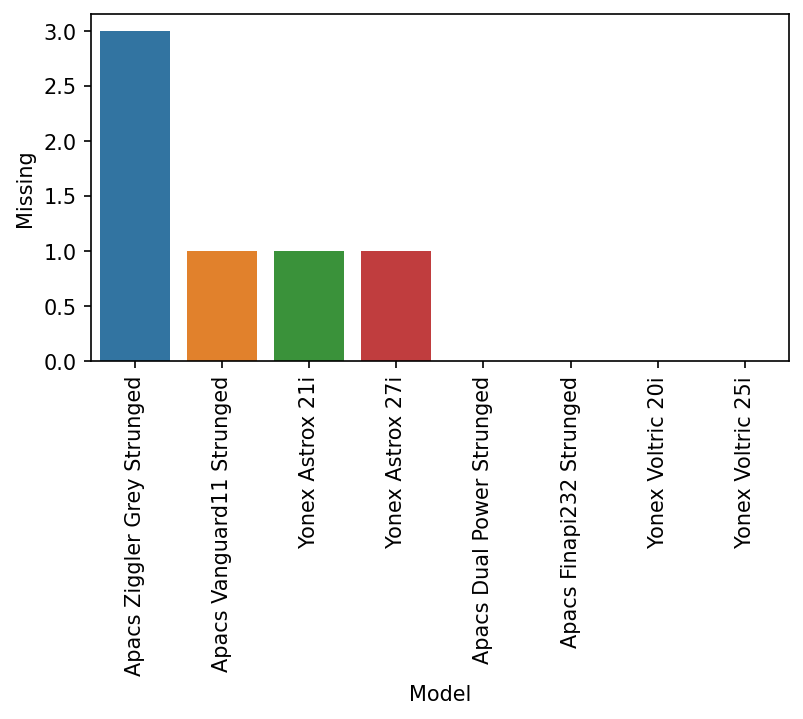

In [27]:
plt.figure(figsize=(6,3),dpi=150)
sns.barplot(x='Model',y='Missing', data=t)
plt.xticks(rotation=90);